# Your first venture into Deep Learning

Hello, welcome to this last part of your journey towards deep learning and AI. Maybe it isn't the last part but really your first step.
So far you have learned a lot about Data Science, and the power of data and machine learning. Deep learning goes a step further and enables us to work with almost any kind of data, structured or unstructured, to gain insights and use from it. Deep learning is an important, probably the most important part for any "weak" AI System (that is a system that is only intelligent in a restricted setting) and for any upcoming strong or general AI.

But before we build an AI Butler or a self driving car, we should start with something more familiar to you.
Deep learning essentially follows the same structure as any supervised machine learning: it can perform classification and regression given features and a target. (There are more advanced deep learning use cases like reinforcement learning, but we won't cover them here)

Deep learning is a computer technique to extract and transform data–-with use cases ranging from human speech recognition to animal imagery classification–-by using multiple layers of neural networks. Each of these layers takes its inputs from previous layers and progressively refines them. The layers are trained by algorithms that minimize their errors and improve their accuracy. In this way, the network learns to perform a specified task.

This first notebook will walk you through a regression task on tabular data (something you are familiar with) using deep learning.
A lot of people assume that you need all kinds of hard-to-understand stuff to get great results with deep learning, but as you'll see it can be quite simple.
We will be using the fast.ai library which is build on top of Pytorch and makes deep learning relatively simple. fast.ai also provides a course and a book, that make up a good portion of our Techlabs AI track, so if you haven't had enough after this track you know where to find more!

You first need to have the following libraries installed.
If you find yourself without one of them, uncommend the corresponding line and install it (make sure this notebook is opened in the environment you want the package to be installed in)

In [1]:
##not necessary if run in colabs:
#!pip install -q seaborn 
##necessary even in colabs:
#!pip install -Uqq fastbook #if this does not work try:
#!pip install fastai==2.0

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from fastai import * #good for experimentation not production code
from fastai.tabular.all import * #good for experimentation not production code

# Regression using a deep neural net

**Remember:** In a regression problem, we aim to predict the output of a continuous value, like a price. Whereas in a classification problem, we aim to select a class from a list of classes (for example, where a picture contains a dog or a cat, recognizing which pet is in the image).

This notebook uses the classic Auto MPG Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. 
To do this, we'll provide the model with a description of many automobiles from that time period. 
This description includes attributes like: cylinders, displacement, horsepower, and weight.

We load the data through the public url and name the columns accprding to the documentation. Run the code below to get a csv of the raw dataset.

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

Let's look at the data to get a feel of what the dataset contains.

#### NOW YOU
use functions and methods you know like `.head()` to get a good look at the raw data. Don't change anything in the data just yet.

In [3]:
data = raw_dataset.copy()
data.head(10) ##NOW YOU PART

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [4]:
data.tail() ##NOW YOU PART

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
data.describe().T ##NOW YOU PART

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### Clean the data
As with any data application or ML algorithm Deep Learning requires relatively clean data. Sometimes the model itself may help you clean the data (e.g. in Image recognition) but more on that later. 

Let's check the data.

The dataset may contain a few unknown or missing values.
#### NOW YOU 
Find out how many missings are in each column of the dataset.

In [6]:
data.isna().sum()#NOW YOU PART

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

As there are only very few missing values we can just drop them.

In [7]:
data.dropna(inplace = True) #careful with 'inplace = True', only use it if you are sure what the result is

### Looking at the individual columns

If you haven't inspected the individual columns yet, it is a good time to do so here.

If we look at the "Origin" column we see that it is categorical and not numeric. In order to make our neural network work we need to convert the categories to numbers and one-hot encode them.

#### NOW YOU 

overwrite the 'Origin' column with the number mappins given in the origin_mappings dictionary.

In [8]:
origin_mappings = {1: 'USA', 2: 'Europe', 3: 'Japan'}
data['Origin'] = data['Origin'].map(origin_mappings) ##NOW YOU PART
data.head()#check if everything is correct

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


Next we will one-hot-encode our categories. There are multiple ways to do that, we will use plain pandas. Other ways would include scikit learn, and fast ai. Check out their documentation to find out how we might have accomplished this task through their functions. Maybe fast.ai would have been faster?

In [9]:
data = pd.get_dummies(data, prefix='', prefix_sep='')
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


### Split the data into train and test

#### NOW YOU
Split the dataset into a training set and a test set. Use 80% of the data for our training set. Set a random_state.

We will use the test set in the final evaluation of our models and won't look at it before that to avoid any data.

In [10]:
train = data.sample(frac=0.8, random_state = 13)#NOW YOU PART
test = data.drop(train.index)#NOW YOU PART

### Inspect the data visually
Let's have a quick look at the joint distribution of a few pairs of columns from the training set.

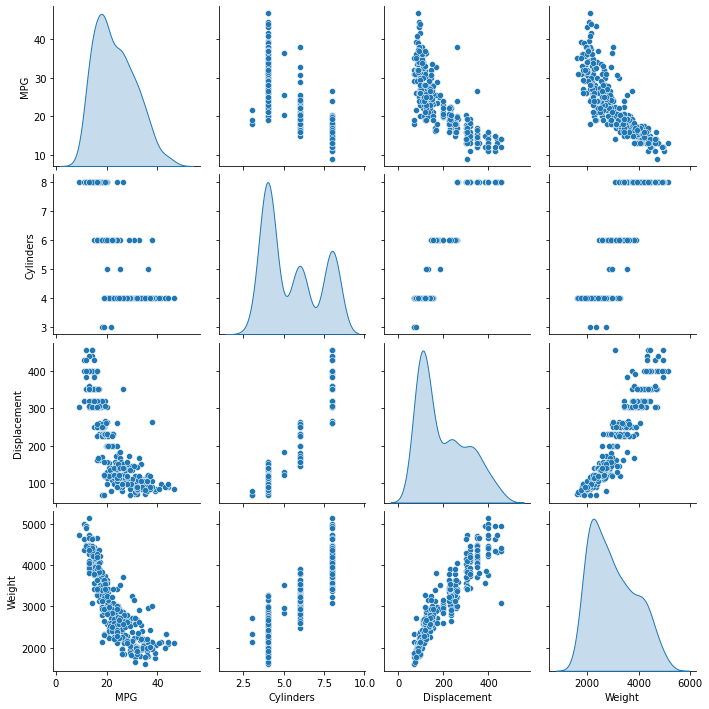

In [11]:
sns.pairplot(train[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

#### NOW YOU

Take your time and study the plot, try to spot some relationships. Think about which features could have the highest importance.


- ...
- ...
- ...





**ONLY READ ON IF YOU HAVE CAREFULLY THOUGHT ABOUT THE TASK ABOVE**

**No Cheating**



Looking at the top row it should be clear that the fuel efficiency (MPG) is a function of all the other parameters. Looking at the other rows it should become evident that they are each functions of eachother.

Let's also look at the overall statistics, note how each feature covers a very different range:

In [12]:
train.describe().T #.T transposes the output dataframe

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.294268,7.820839,9.0,17.000,22.0,29.00,46.6
Cylinders,314.0,5.522293,1.709160,3.0,4.000,4.5,8.00,8.0
Displacement,314.0,197.621019,106.673727,68.0,105.000,151.0,302.00,455.0
Horsepower,314.0,105.133758,38.998746,46.0,76.000,95.0,129.75,230.0
Weight,314.0,3006.493631,866.648081,1613.0,2226.500,2834.0,3649.50,5140.0
Acceleration,314.0,15.550955,2.790505,8.5,13.525,15.5,17.00,24.6
Model Year,314.0,75.875796,3.707413,70.0,73.000,76.0,79.00,82.0
Europe,314.0,0.162420,0.369425,0.0,0.000,0.0,0.00,1.0
Japan,314.0,0.210191,0.408095,0.0,0.000,0.0,0.00,1.0
USA,314.0,0.627389,0.484272,0.0,0.000,1.0,1.00,1.0


#### NOW YOU
Think about what this might mean for our Neural network, do we need to scale the features? Normalize them? Which range is appropriate and why? Note down your answer, we will get to this issue in a moment.

- ...
- ...
- ...


### Split features from labels

We still need to separate the target value, the "label", from the features. This label is the value that you will train the model to predict. In our case 'MPG' (miles per gallon)

In [13]:
train_features = train.copy()
test_features = test.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

#### BONUS: think about other ways of accomplishing the operation above and share them with your fellow learners on Slack

#### NOW YOU 
Check if everything went as expected by looking at the data and shape of the data

In [14]:
train_features.head() #NOW YOU PART

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
45,6,258.0,110.0,2962.0,13.5,71,0,0,1
101,6,198.0,95.0,2904.0,16.0,73,0,0,1
38,8,350.0,165.0,4209.0,12.0,71,0,0,1
27,8,318.0,210.0,4382.0,13.5,70,0,0,1
111,3,70.0,90.0,2124.0,13.5,73,0,1,0


In [15]:
train_features.shape #NOW YOU PART

(314, 9)

In [16]:
train_labels.head() #NOW YOU PART

45     18.0
101    23.0
38     14.0
27     11.0
111    18.0
Name: MPG, dtype: float64

In [17]:
train_labels.shape #NOW YOU PART

(314,)

### Normalization
Just a moment ago you thought about the different scales our features have. If you want to look again: In the table of statistics it's easy to see how different the ranges of each feature are.

In [18]:
train_features.describe().T[["mean", "std","min","max"]]

,mean,std,min,max
Cylinders,5.522293,1.709160,3.0,8.0
Displacement,197.621019,106.673727,68.0,455.0
Horsepower,105.133758,38.998746,46.0,230.0
Weight,3006.493631,866.648081,1613.0,5140.0
Acceleration,15.550955,2.790505,8.5,24.6
Model Year,75.875796,3.707413,70.0,82.0
Europe,0.162420,0.369425,0.0,1.0
Japan,0.210191,0.408095,0.0,1.0
USA,0.627389,0.484272,0.0,1.0


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because in a Neural Network the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable and is a basic step in most Deep Learning workflows.


**fast.ai** makes Normalizing very easy. They provide a Dataloader which can load and transform your data as needed. The `from_df()` method takes the `procs=`argument which let's you specify which processing steps you want the DataLoader to perform. In our case we could have used `Categorify,Normalize` and maybe even others that handle missings. fast.ai provides a lot of these handy functionalities that you will learn about further down the road, or when you check out their extensive documentation.

Here we will use the `TabularDataLoaders` which is a class that combines data loading and preparation. It makes our data 'ready' to be use by our deep learning model. If this seems a little 'black-box' right now it's fine. You can dig into the code and create more custom ways to load and prepare data later if you want. The AI-track will give you more knowledge on how to do these things. For now we will stick to the high level basics so that we can create something that works before going into all of the details.



More about the tabular data loaders and related functions [here](https://docs.fast.ai/tabular.data.html)

The `TabularDataLoaders` from fast.ai also expects you to pass the names of all continous and categorical variables.

#### NOW YOU
List the categorical and continous variables from our dataframe below to pass them to the function.

In [20]:
cat_names = ['Cylinders','Model Year', 'Europe', 'USA', 'Japan'] ##NOW YOU PART
cont_names = ['Displacement', 'Horsepower', 'Weight', 'Acceleration'] ##NOW YOU PART
procs = [Categorify,Normalize]
y_names = 'MPG'
dls = TabularDataLoaders.from_df(data, procs=procs, 
                                 cat_names=cat_names, #NOW YOU PART
                                 cont_names=cont_names, #NOW YOU PART
                                 y_names= y_names, bs=64) #bs is the batch size more on that later


We can use our dataloaders object (dls) and look at a batch with `.show_batch()`

In [21]:
dls.show_batch()

,Cylinders,Model Year,Europe,USA,Japan,Displacement,Horsepower,Weight,Acceleration,MPG
0,4,78,0,1,0,105.000001,75.000001,2230.000006,14.500000,30.900000
1,4,80,1,0,0,146.000000,67.000001,3250.000011,21.800000,30.000000
2,6,75,0,1,0,250.000000,72.000000,3157.999995,19.500000,15.000000
3,4,75,0,0,1,118.999998,97.000000,2544.999986,17.000000,24.000000
4,6,77,0,1,0,231.000001,105.000000,3425.000023,16.900000,20.500000
5,4,80,0,0,1,85.000000,65.000002,2110.000047,19.200001,40.799999
6,4,82,0,1,0,98.000002,69.999999,2125.000029,17.299999,36.000000
7,8,75,0,1,0,349.999997,145.000001,4440.000051,14.000000,15.000000
8,6,79,0,1,0,173.000000,115.000000,2699.999988,12.900000,26.799999
9,8,75,0,1,0,350.999998,147.999999,4657.000003,13.500000,14.000000


## Training the model

Now we need to specify the model. fast.ai makes this very easy, if you are just starting out you can use their functions and defaults to create working solutions without having to specify layers,activation functions, optimizers etc. (which is the goal here as we don't expect you to know everything from the start)

We simply create a learner with `tabular_leaner()` pass in our dataloaders object and set a metric. In our case the mean-absolute-error will do fine, remember this is a regression problem.

In [22]:
learner = tabular_learner(dls, metrics = mae)

Now that we have specified the model it's time to train it.
fast.ai provides different ways to train a model, we will use the one cycle method. If you are curious what it does check out the documentation.

In order to fit a model, we have to provide at least one piece of information: how many times to look at each data point (known as number of epochs). The number of epochs you select will largely depend on how much time you have available, and how long you find it takes in practice to fit your model. If you select a number that is too small, you can always train for more epochs later.

Here we will use 35 epochs. If you want to learn how to select the number of epochs or what automatic methods for the epoch settings there are (e.g. early stopping) check out our AI track.

### BONUS
Once you are done with this notebook, experiment with using more ore less epochs to train, notice what happens to the MAE and to the train and validation losses.

In [23]:
learner.fit_one_cycle(35)

epoch,train_loss,valid_loss,mae,time
0,623.683716,602.916016,23.359640,00:00
1,620.795532,602.722046,23.358707,00:00
2,610.199158,602.071411,23.349718,00:00
3,608.802551,600.767822,23.329556,00:00
4,599.497131,598.226135,23.286459,00:00
5,591.940063,593.929688,23.208399,00:00
6,580.924683,586.575073,23.071112,00:00
7,567.607971,575.072815,22.853086,00:00
8,551.509277,556.942932,22.503971,00:00
9,527.635559,526.459534,21.903715,00:00


## Model evaluation

After we have trained our model and looked at the validation MAE (that is the score on the validation set which was automatically created by fast.ai), it's time to see how it performs on unseen data. You can use the `learner.predict()` to get predictions for a single row of data. To get predictions on our test data (test_features) and compare the predicition to the actual labels  (test_labels) you can use the test_dl method from the DataLoaders. This will load the test dataframe and prepare it for predicitions. *Note*: this dataframe should not have the dependent variable in its columns, so we will just use our test_features not the test_labels.

In [24]:
test_dl = learner.dls.test_dl(test_features)

preds = learner.get_preds(dl = test_dl)
#preds is a tuple containing a tensor, extract tensor convert to array and unpack array for calculation of MAE
preds = np.array(preds[0].T)[0]
preds

array([13.807336 , 12.872526 , 18.78792  , 22.703829 , 18.547287 ,
       14.533606 , 13.948363 , 27.904154 , 25.363525 , 20.450449 ,
       13.841672 , 18.958103 , 24.099007 , 12.725675 , 23.238585 ,
       12.755416 , 13.349546 , 18.41113  , 24.03061  , 12.700475 ,
       25.30599  , 26.054203 , 29.26709  , 25.577553 , 25.580093 ,
       28.719599 , 18.637259 , 12.569    , 19.179398 , 11.560594 ,
       22.842741 , 28.94593  , 21.707985 , 32.402493 , 24.534386 ,
       21.109545 , 28.989765 , 15.527146 , 26.699474 , 14.643735 ,
       15.746827 , 15.385218 , 30.131628 ,  5.3677673, 32.466118 ,
       33.984554 , 22.133585 , 22.137379 , 22.636988 , 21.997477 ,
       15.398252 , 21.806215 , 24.292084 , 17.06864  , 17.39977  ,
       24.130968 , 24.86997  , 19.62983  , 38.719486 , 36.944336 ,
       14.939656 , 35.843555 , 34.240826 , 40.113426 , 37.333633 ,
       38.8823   , 27.160076 , 32.767666 , 29.573904 , 34.43805  ,
       35.23474  , 35.526    , 25.430729 , 26.032482 , 26.6296

#### NOW YOU 

Calculate the mean absolute error using the respective function from scikit-learn, the test labels and our predictions.

In [25]:
mean_absolute_error(test_labels,preds) #NOW YOU PART

2.4506746047582384

If everything went correct this error looks really good. (in my version around 2.1, which is even slightly better than my validation error.

### Visualize predictions

#### Scatterplot (with regression line)

You can use this to visualize how close the predicitions are to the actual values. If everything worked well the dots should be very close to the diagonal line (which in this case would mean perfect prediction)

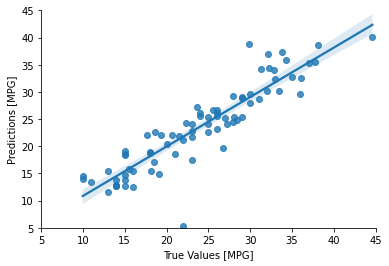

In [26]:
sns.regplot(x = test_labels, y = preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
sns.despine()
plt.xlim([5,45])
plt.ylim([5,45])
plt.show()

#### Error distribution

Text(0.5, 0, 'Prediction Error [MPG]')

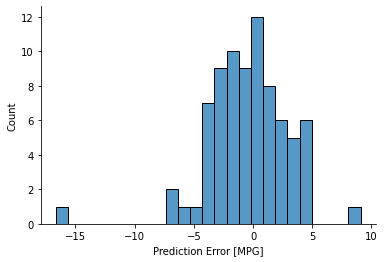

In [27]:
error = preds - test_labels
sns.histplot(error, bins=25)
sns.despine()
plt.xlabel('Prediction Error [MPG]')

And that's basically it. Of course you can add steps, or use other techniques to gain more insights. But you have just trained a Neural Network on tabular data and gotten pretty good results.

Check out the following notebooks to see how to use fast.ai and neural nets for image classification.

### BONUS

1. Compare your results with other methods (e.g linear regression, random forest, svm). Post your results in the slack channel.

2. Try to reach the best MAE without overfitting. If necessary revise how to spot overfitting and discuss it with your fellow learners!